## CNN on MNIST
Using Keras on the MNIST data set. We will use a Convolutional Neural Network because CNN's are well suited for image processing.

In [2]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

In [3]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


We want to train our model on a 28x28 image, so we must shape our data as such. But how we import each picture depends on where the color channel is listed. We must acount for this. This is gray scale so there is only one channel dimension as oposed to 3 for RBG.

In [7]:
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [10]:
train_images /= 255
test_images /= 255

Convert our train and test labels to be categorical in one-hot format:

In [12]:
train_labels = tensorflow.keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = tensorflow.keras.utils.to_categorical(mnist_test_labels, 10)

Print out one of the training images with its label:

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


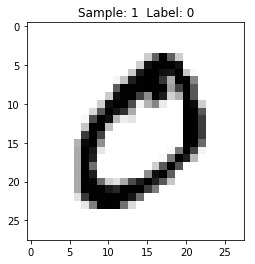

In [14]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1)

We'll start with a 2D convolution of the image - it's set up to take 32 windows, or "filters", of each image, each filter being 3x3 in size. We then run a second convolution on top of that with 64 3x3 windows (recommended within Keras's examples).

Next we apply a MaxPooling2D layer.

A dropout filter is then applied to prevent overfitting.

Next we flatten the 2D layer into a 1D layer, and can now treat this as a traditional multi-layer perceptron...

Then feed that into a hidden, flat layer of 128 units.

We then apply dropout again to prevent overfitting.

And finally, softmax is applied to choose our category of 0-9.

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

Model Description

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

Using adam as the optimizer, but RMSProp would work very well also.

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

And now we train our model. Limiting the batch size to make things run a little faster.

In [9]:
history = model.fit(train_images, train_labels,
                    batch_size=32,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 1026s - loss: 0.1926 - acc: 0.9418 - val_loss: 0.0499 - val_acc: 0.9834
Epoch 2/10
 - 995s - loss: 0.0817 - acc: 0.9759 - val_loss: 0.0397 - val_acc: 0.9874
Epoch 3/10
 - 996s - loss: 0.0633 - acc: 0.9811 - val_loss: 0.0339 - val_acc: 0.9895
Epoch 4/10
 - 991s - loss: 0.0518 - acc: 0.9836 - val_loss: 0.0302 - val_acc: 0.9909
Epoch 5/10
 - 996s - loss: 0.0442 - acc: 0.9861 - val_loss: 0.0322 - val_acc: 0.9905
Epoch 6/10
 - 994s - loss: 0.0395 - acc: 0.9878 - val_loss: 0.0303 - val_acc: 0.9898
Epoch 7/10
 - 1001s - loss: 0.0329 - acc: 0.9890 - val_loss: 0.0328 - val_acc: 0.9907
Epoch 8/10
 - 993s - loss: 0.0298 - acc: 0.9907 - val_loss: 0.0336 - val_acc: 0.9916
Epoch 9/10
 - 998s - loss: 0.0296 - acc: 0.9911 - val_loss: 0.0281 - val_acc: 0.9915
Epoch 10/10
 - 996s - loss: 0.0252 - acc: 0.9917 - val_loss: 0.0340 - val_acc: 0.9918


### Final Score

In [10]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.034049834153382426
Test accuracy: 0.9918
